In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../')
import classify
import utils

In [4]:
CALIBRATION_FILE = "../../input/N_matrix_trial9.mat"
# TEST_FOLDER = "../../test/"
# TEST_FILE = TEST_FOLDER + "/sliding13.txt"
TEST_FOLDER = "../../experiment_data/"
# TEST_FILE = TEST_FOLDER + "/new_grass/both_sides_1.txt"
TEST_FILE = TEST_FOLDER + "/both_sides_4-18/5.txt"

DATA_FOLDER = "../../input/both_sides_4-18/"
CTL_FILES = DATA_FOLDER + "ctl*.csv" # No touch data
ACT_FILES = DATA_FOLDER + "act*.csv" # Touch data

In [5]:
utils.print_header(TEST_FILE)

%  Data file recorded 2016/4/18  11:40:14
%  Stride Frequency         = [9, 9]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [100, 0, 100, 0, 0, 100, 0, 100, 0, 0]



In [19]:
test_data = classify.get_test_data(TEST_FILE, CALIBRATION_FILE)

Index([u'time', u'Right Leg Pos', u'Left Leg Pos', u'Commanded Right Leg Pos',
       u'Commanded Left Leg Pos', u'DCR', u'DCL', u'GyroX', u'GyroY', u'GyroZ',
       u'AX', u'AY', u'AZ', u'RBEMF', u'LBEMF', u'VBatt', u'S1', u'S2', u'S3',
       u'S4', u'S5', u'S6', u'S7', u'S8'],
      dtype='object')


#### Experiment 13 Ground Truth: 3.20 seconds

### Random Forest Results

CTL size: 70 ACT size: 40


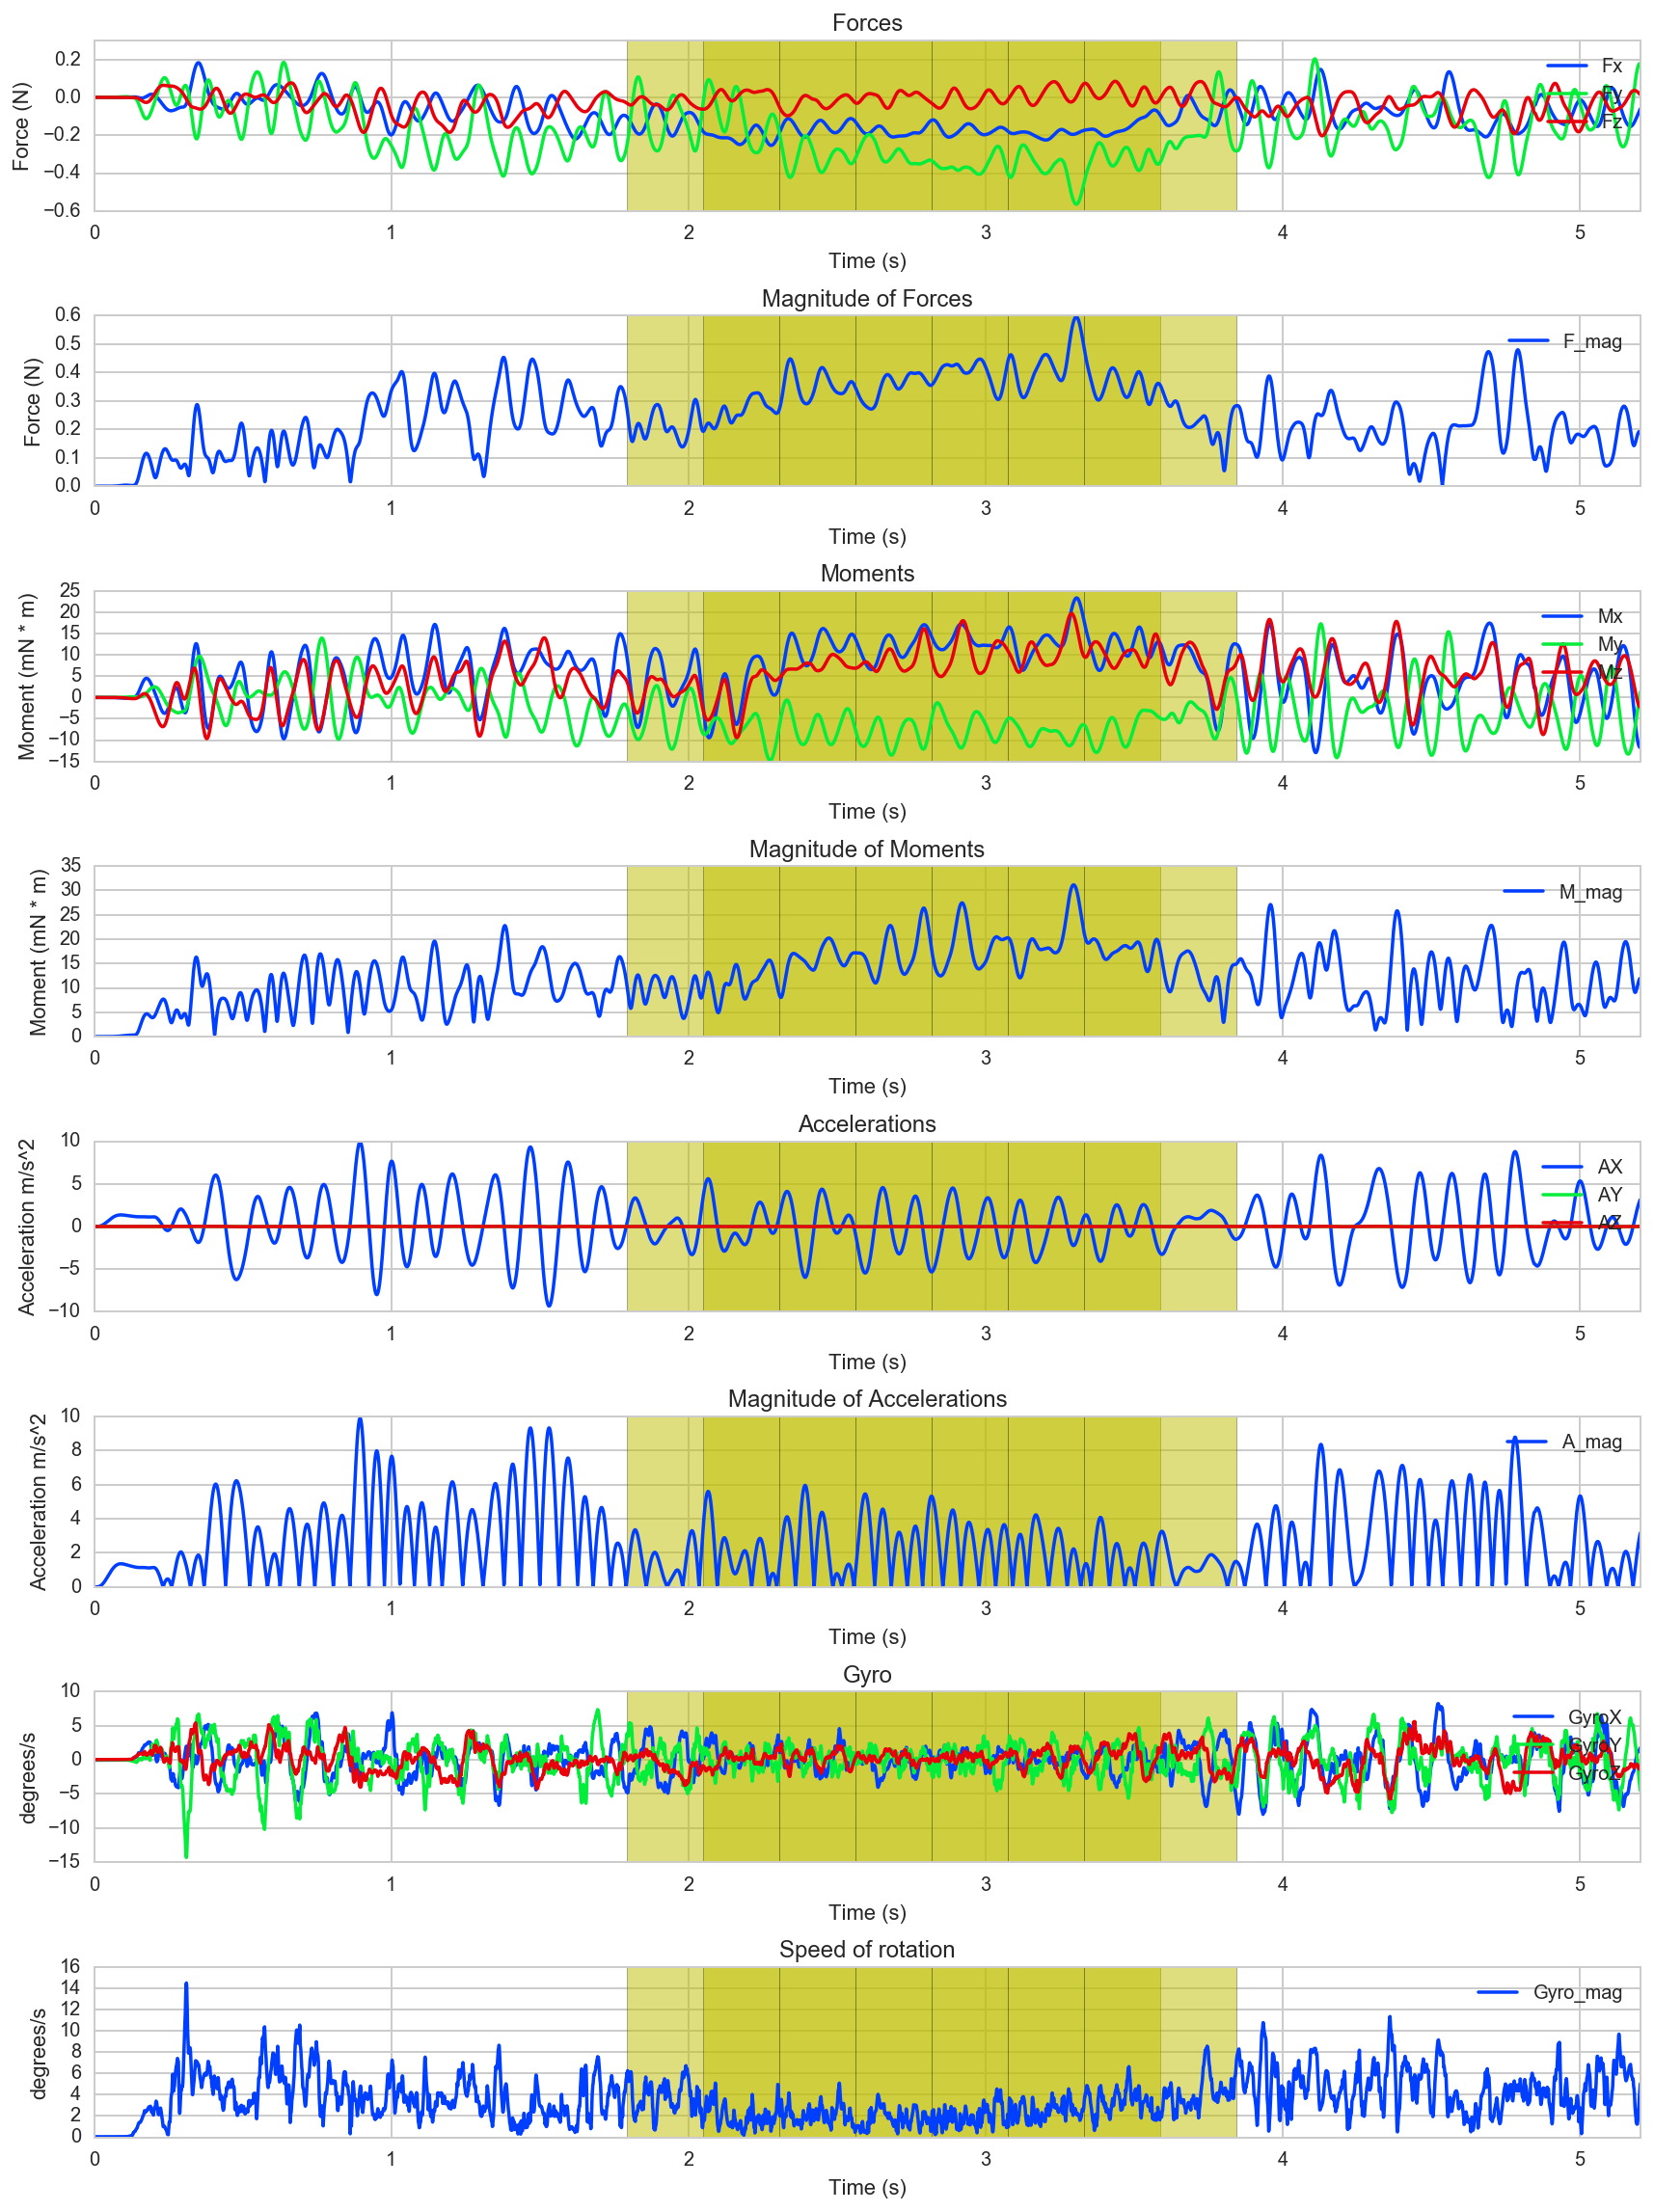

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [20]:
classify.clf_predict_and_visualize(classify.random_forests(), *test_data, ctl_files=CTL_FILES, act_files=ACT_FILES)

### Gradient Boosted Trees Results

CTL size: 70 ACT size: 40


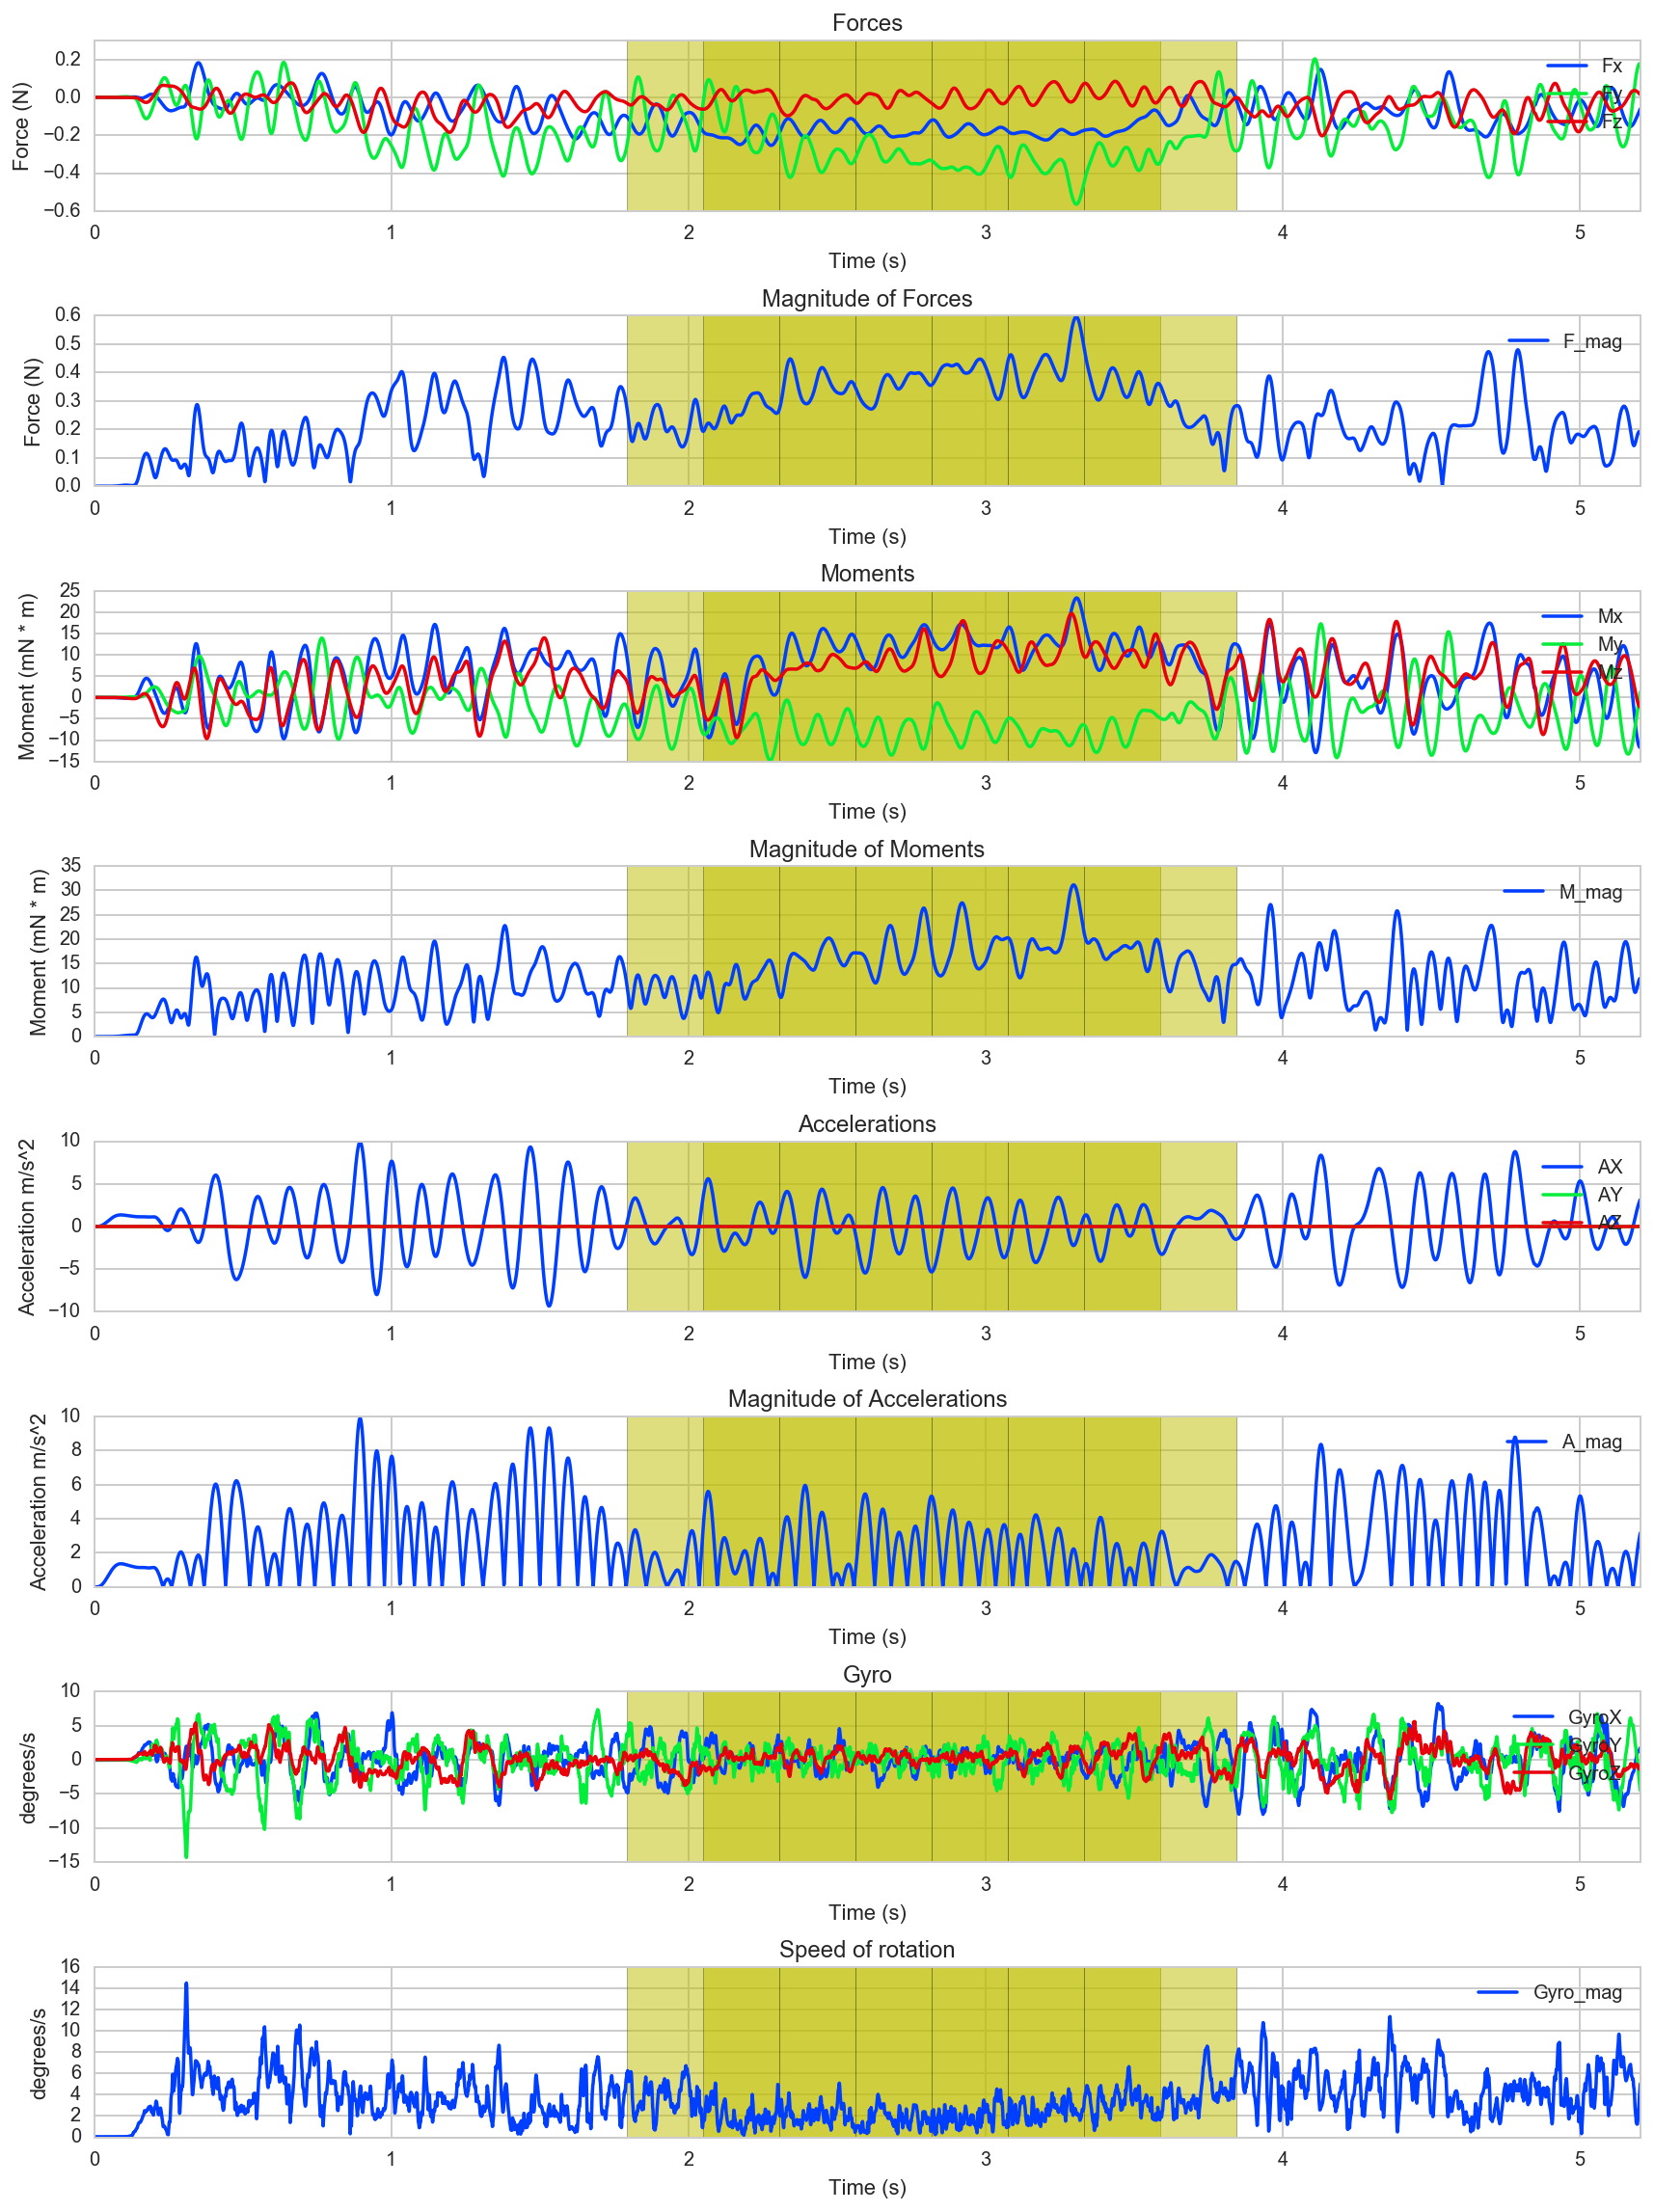

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [21]:
classify.clf_predict_and_visualize(classify.xgb_trees(), *test_data, ctl_files=CTL_FILES, act_files=ACT_FILES)

### Support Vector Machine Results

CTL size: 70 ACT size: 40


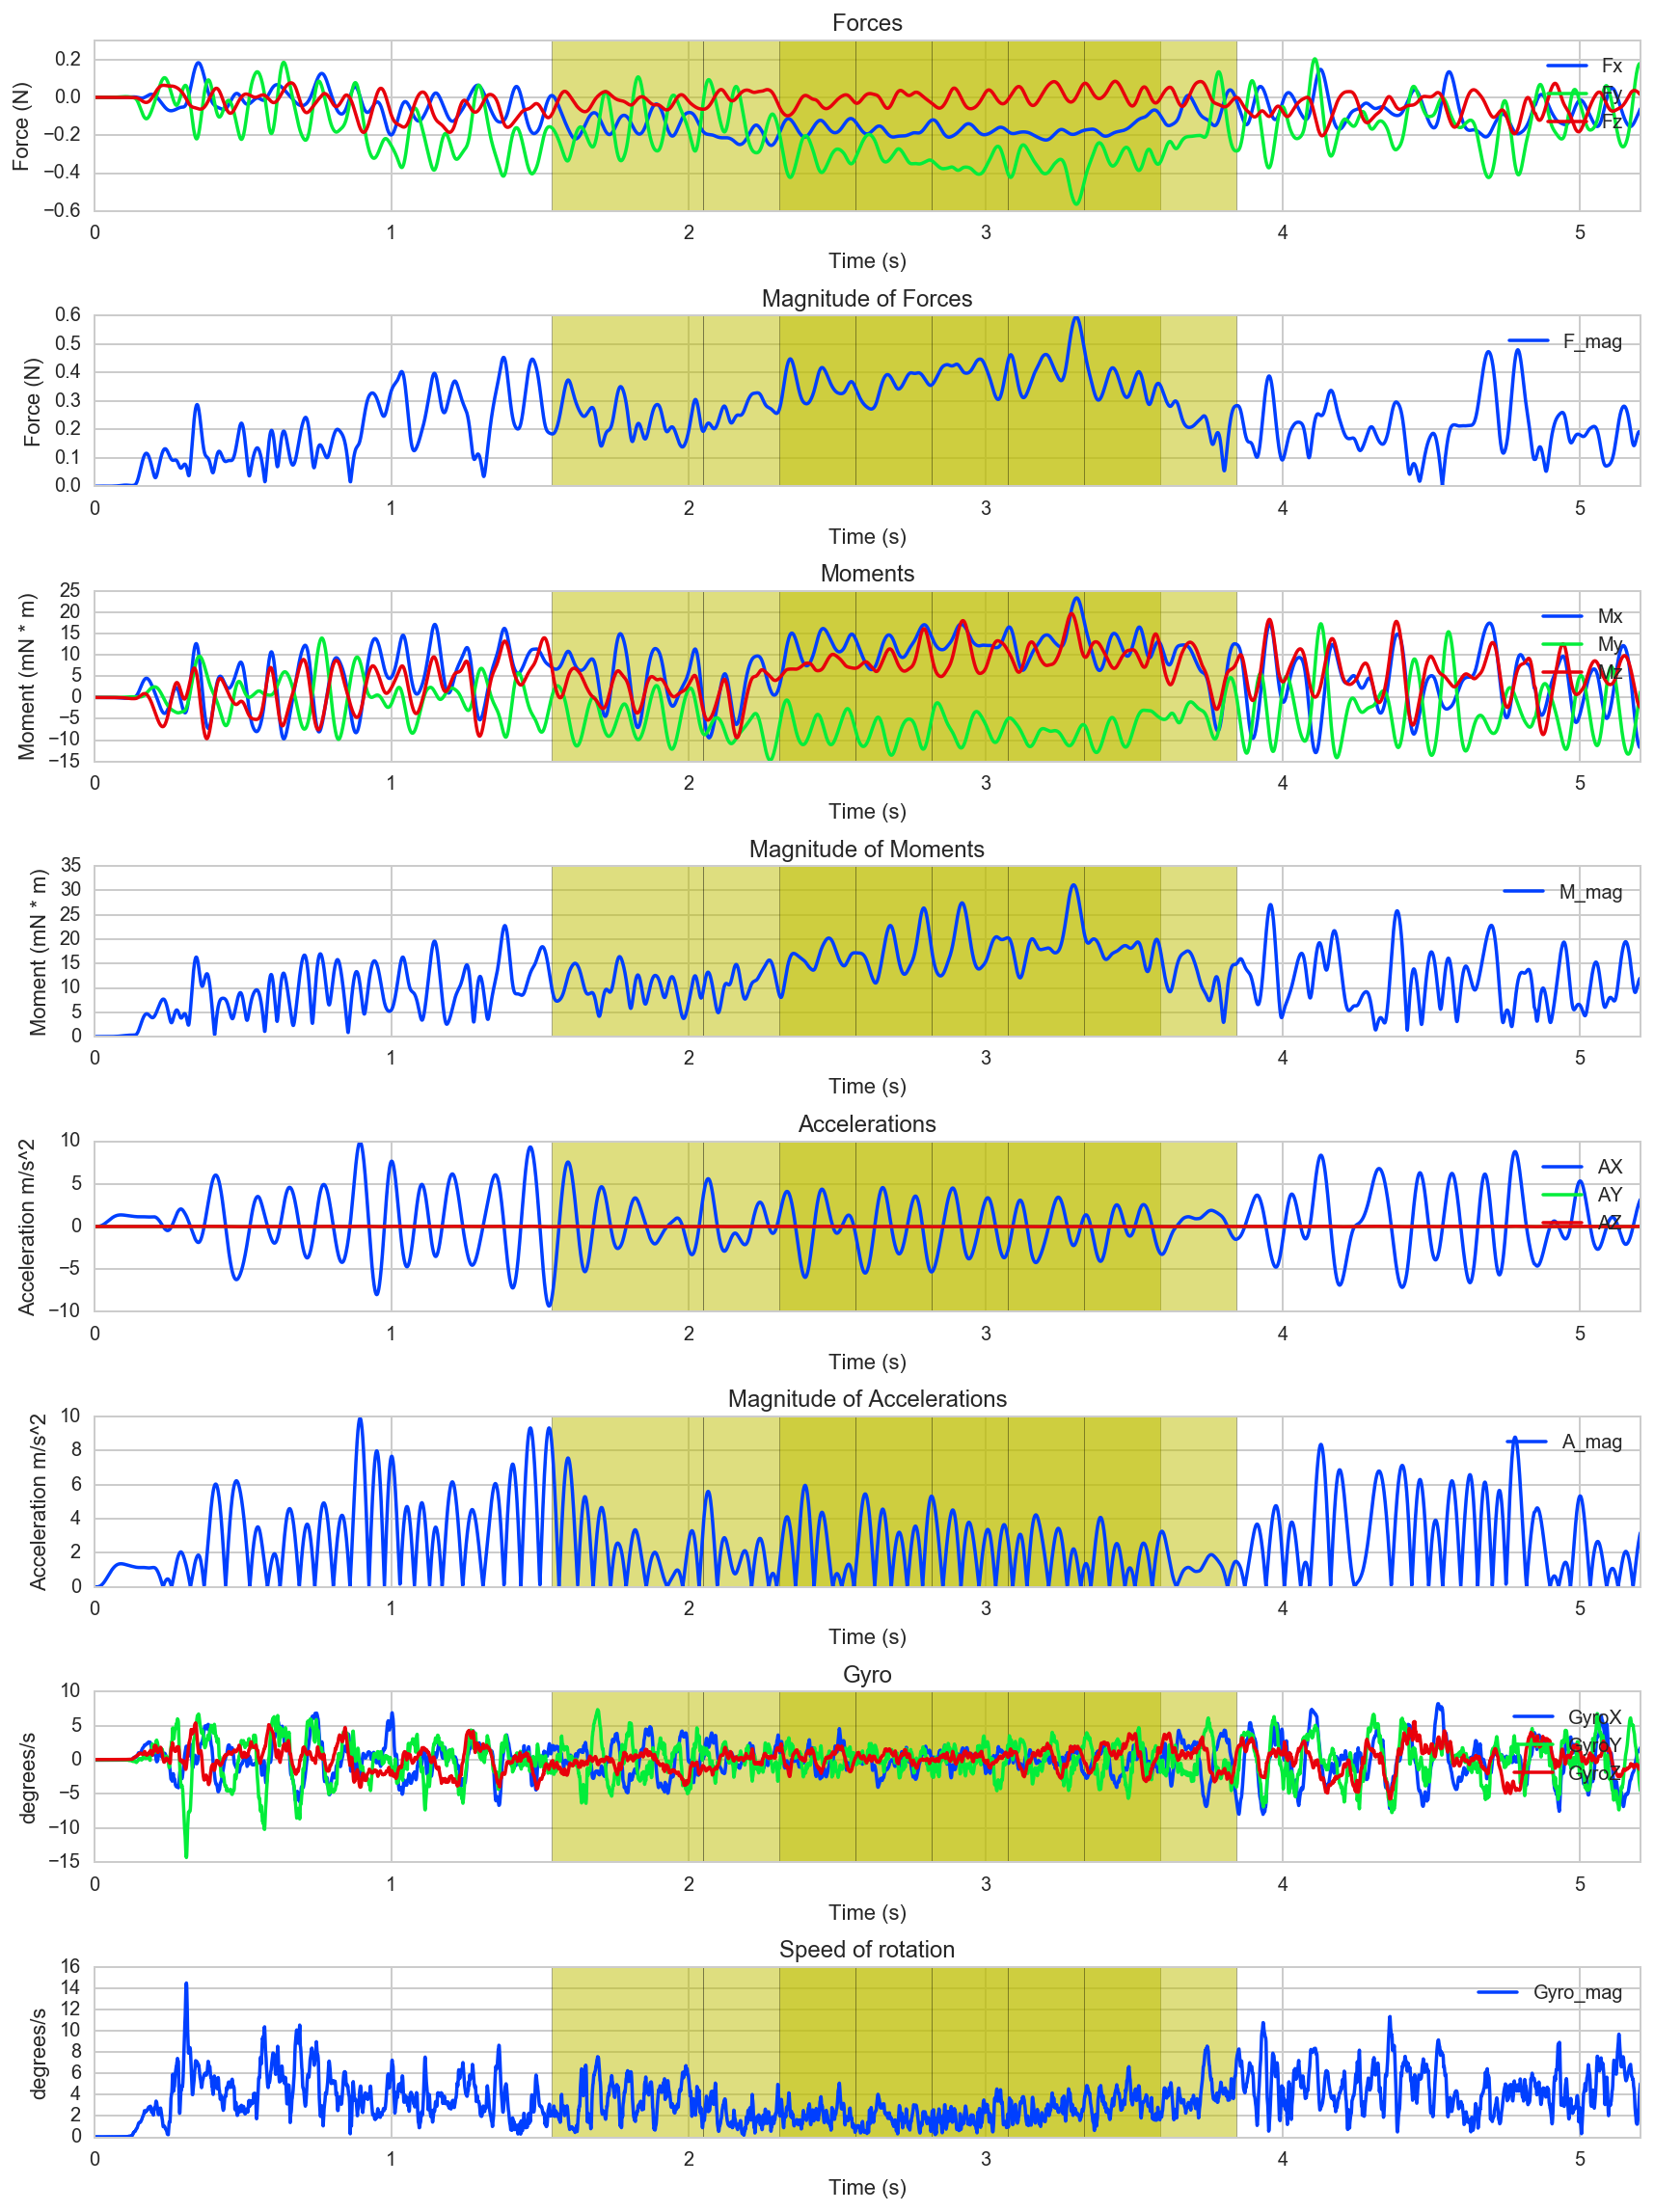

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [22]:
classify.clf_predict_and_visualize(classify.svc(), *test_data, ctl_files=CTL_FILES, act_files=ACT_FILES)

### Neural Net Results

CTL size: 70 ACT size: 40
Step #1, avg. loss: 1.14236
Step #201, epoch #100, avg. loss: 0.07547
Step #401, epoch #200, avg. loss: 0.00474
Step #601, epoch #300, avg. loss: 0.00212
Step #801, epoch #400, avg. loss: 0.00126
Step #1001, epoch #500, avg. loss: 0.00087
Step #1201, epoch #600, avg. loss: 0.00067
Step #1401, epoch #700, avg. loss: 0.00052
Step #1601, epoch #800, avg. loss: 0.00043
Step #1801, epoch #900, avg. loss: 0.00037


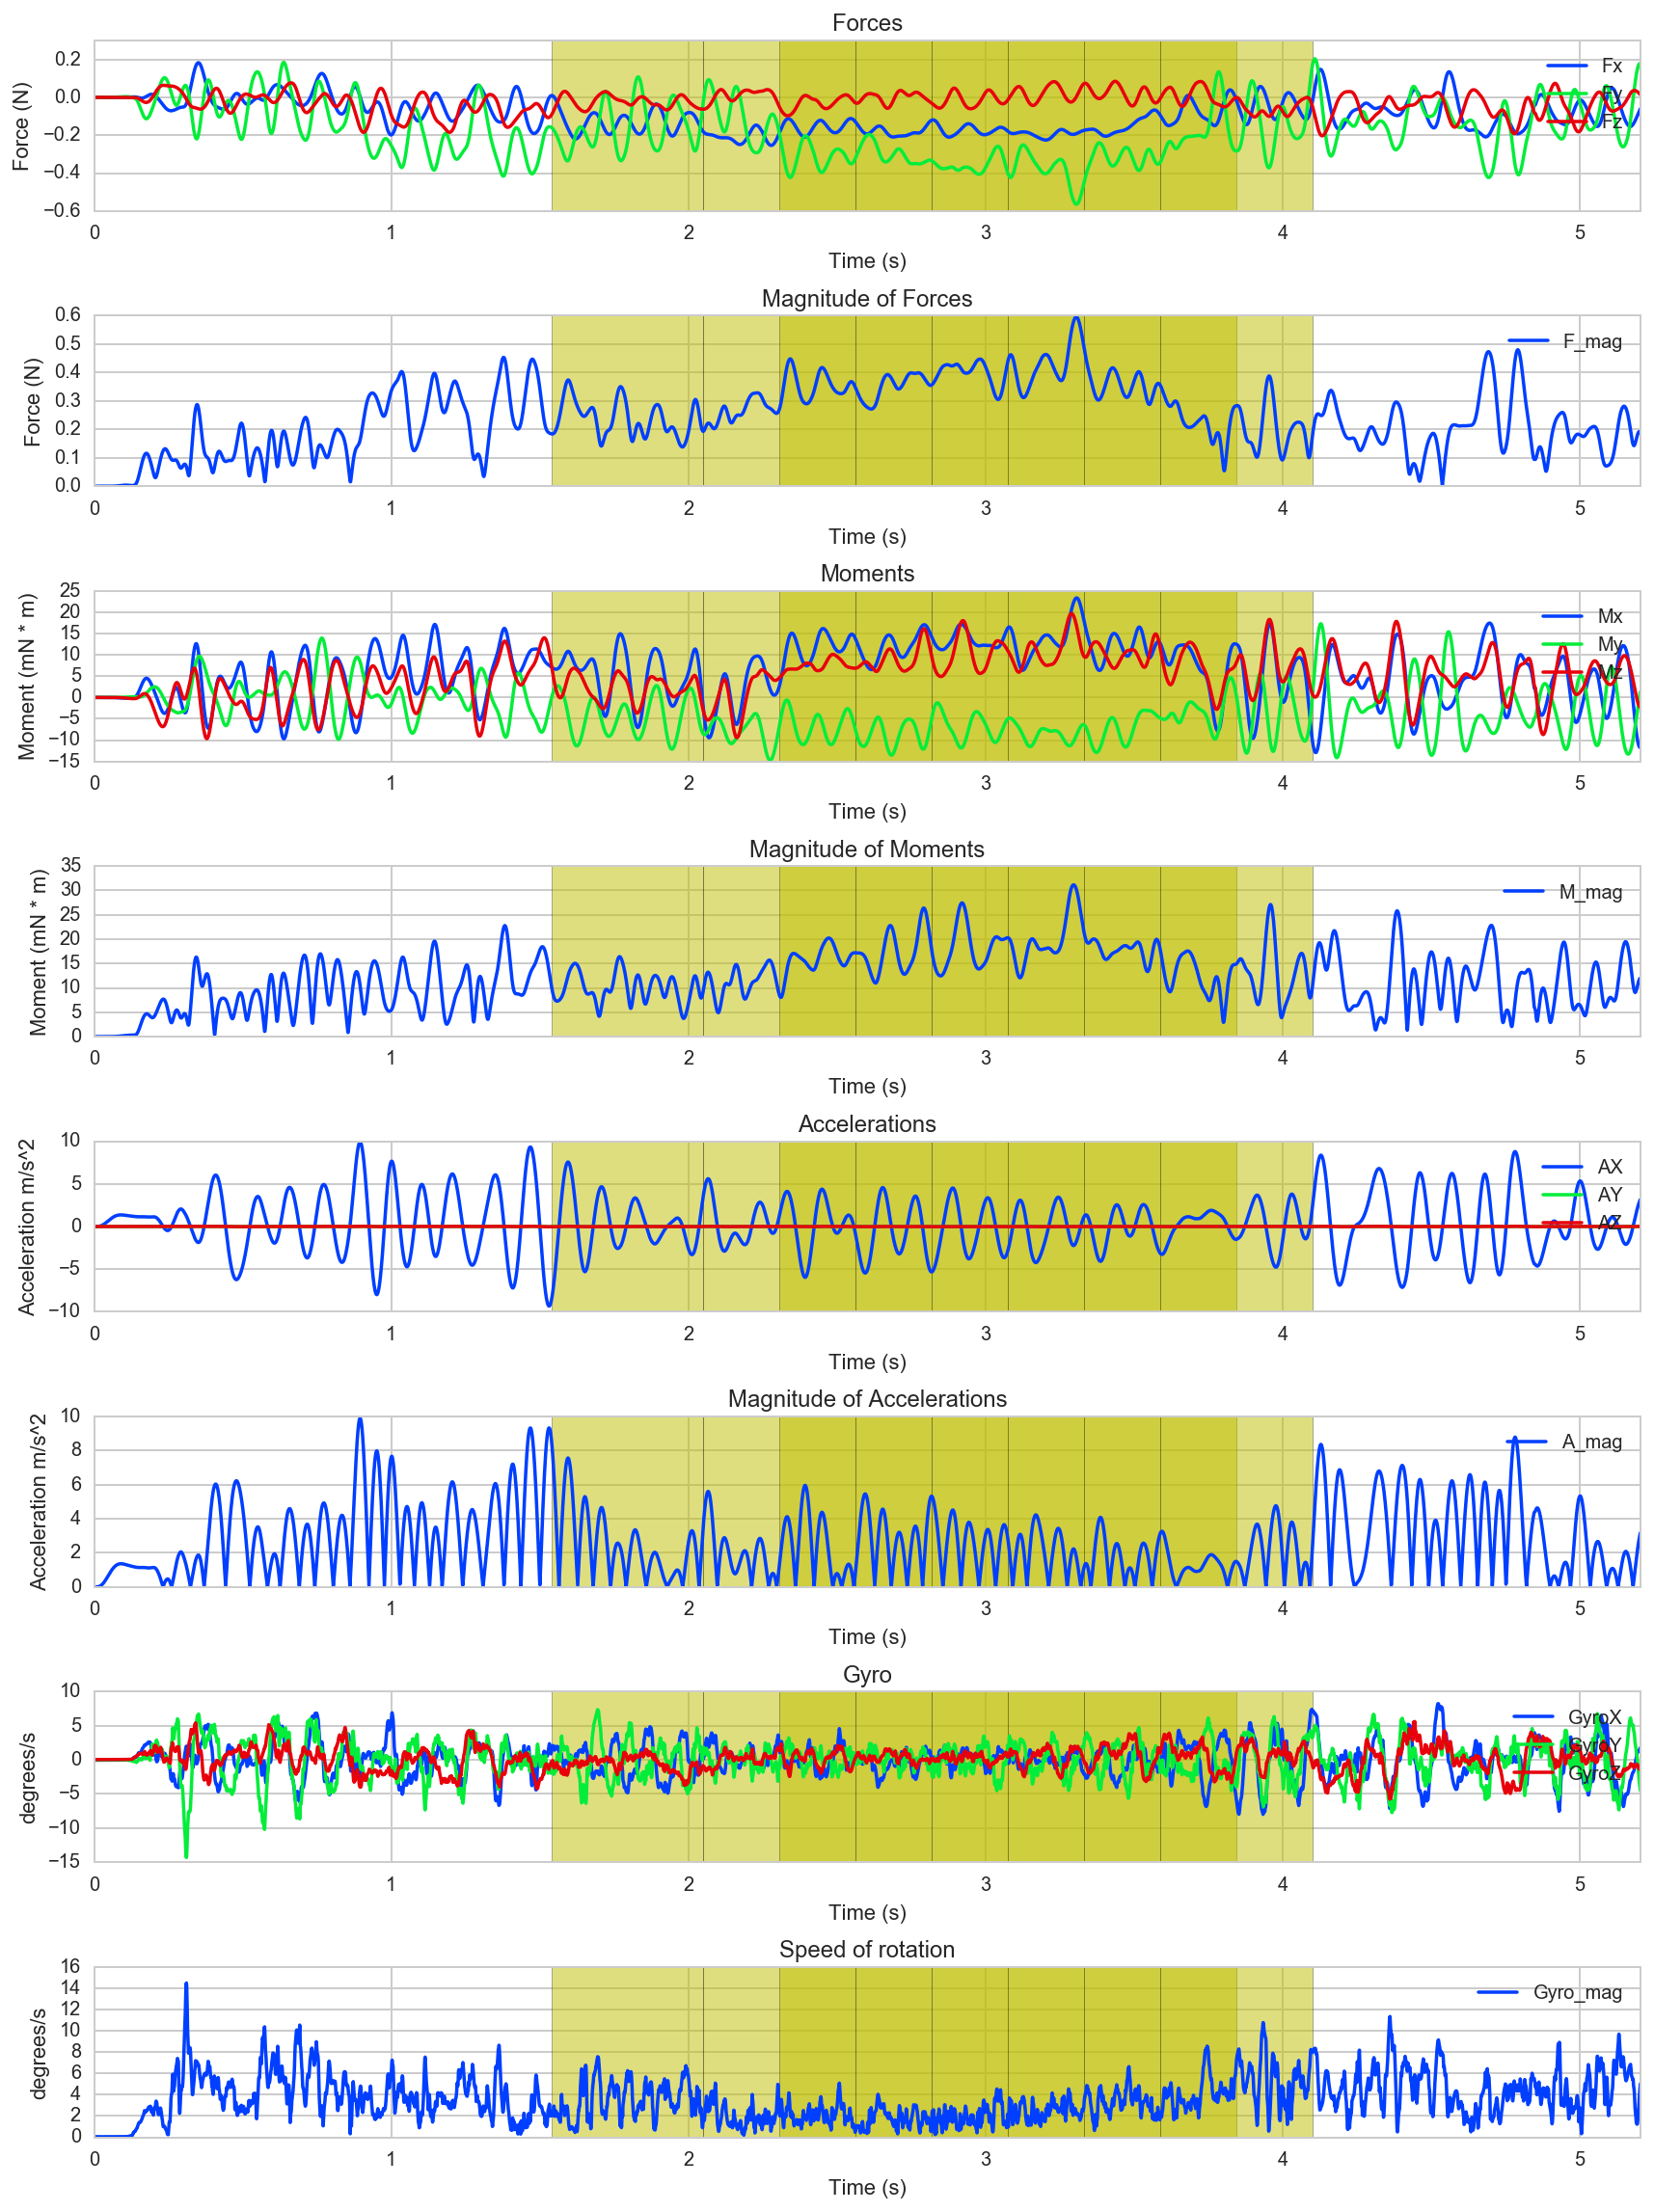

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [23]:
classify.clf_predict_and_visualize(classify.dnn(nn_steps=2000), *test_data, ctl_files=CTL_FILES, act_files=ACT_FILES)

### Ensemble Learning Results

CTL size: 70 ACT size: 40
Step #1, avg. loss: 1.20108
Step #201, epoch #100, avg. loss: 0.07706
Step #401, epoch #200, avg. loss: 0.00517
Step #601, epoch #300, avg. loss: 0.00211
Step #801, epoch #400, avg. loss: 0.00134
Step #1001, epoch #500, avg. loss: 0.00083
Step #1201, epoch #600, avg. loss: 0.00063
Step #1401, epoch #700, avg. loss: 0.00051
Step #1601, epoch #800, avg. loss: 0.00041
Step #1801, epoch #900, avg. loss: 0.00035


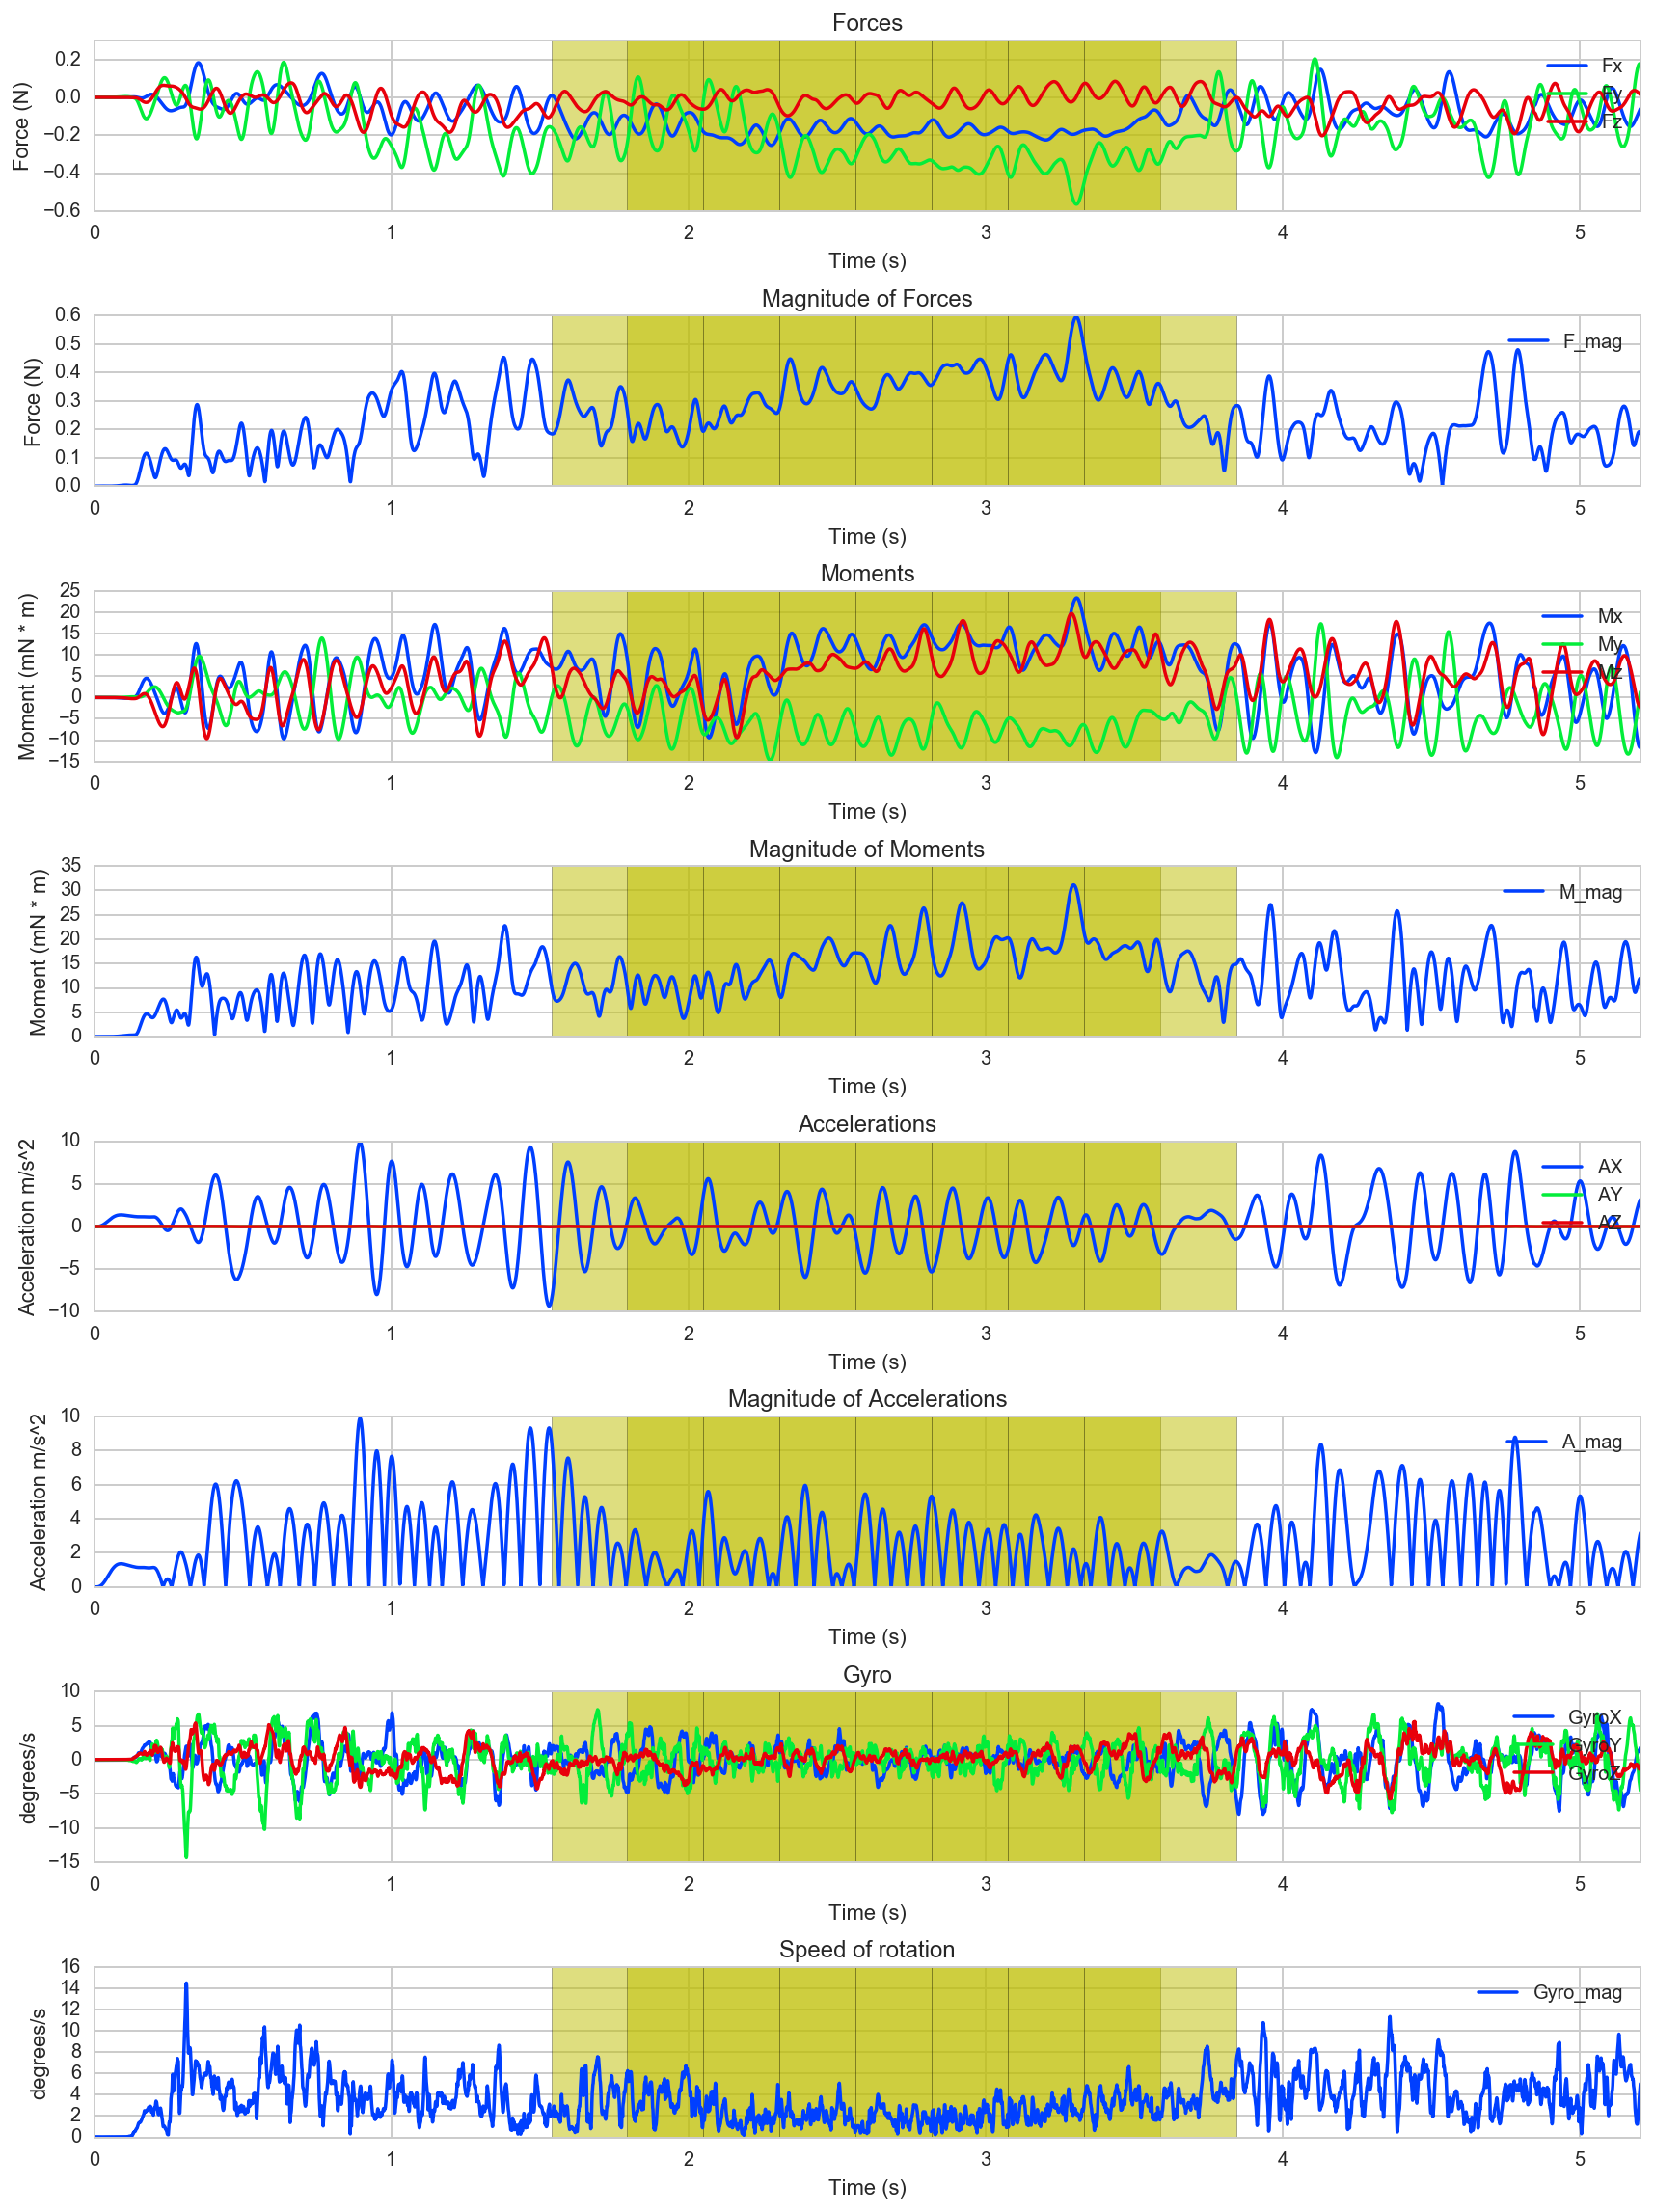

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [24]:
classify.clf_predict_and_visualize(classify.ensemble_clf(), *test_data, ctl_files=CTL_FILES, act_files=ACT_FILES)